In [1]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
(SaratogaNYHomes := pl.read_csv("Data/Saratoga_NY_Homes.csv")
)

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64
132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5,1
181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6,0
109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8,1
155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5,1
86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,0,32,24200,0,0,2,3,3,2310,61,5,1,2.5,11,1
285000,0.94,0,37,36200,0,0,2,3,3,2564,61,4,1,2.5,11,1
194900,0.39,0,9,20400,0,0,2,2,3,1099,51,2,0,1.0,3,0


## Stack the categorized predictors



In [37]:
cat_predictors = (
    SaratogaNYHomes
    .select([
        pl.col("Price"),
        pl.col("Waterfront"),
        pl.col("New.Construct"),
        pl.col("Central.Air"),
        pl.col("Fuel.Type"),
        pl.col("Heat.Type"),
        pl.col("Sewer.Type"),
        pl.col("Fireplaces?")
    ])
    .unpivot(
        index="Price",
        variable_name="predictor",
        value_name="label"
    )
    .to_pandas()
)


In [38]:
cat_predictors.shape


(12096, 3)

## Boxplot of Categorized predictors


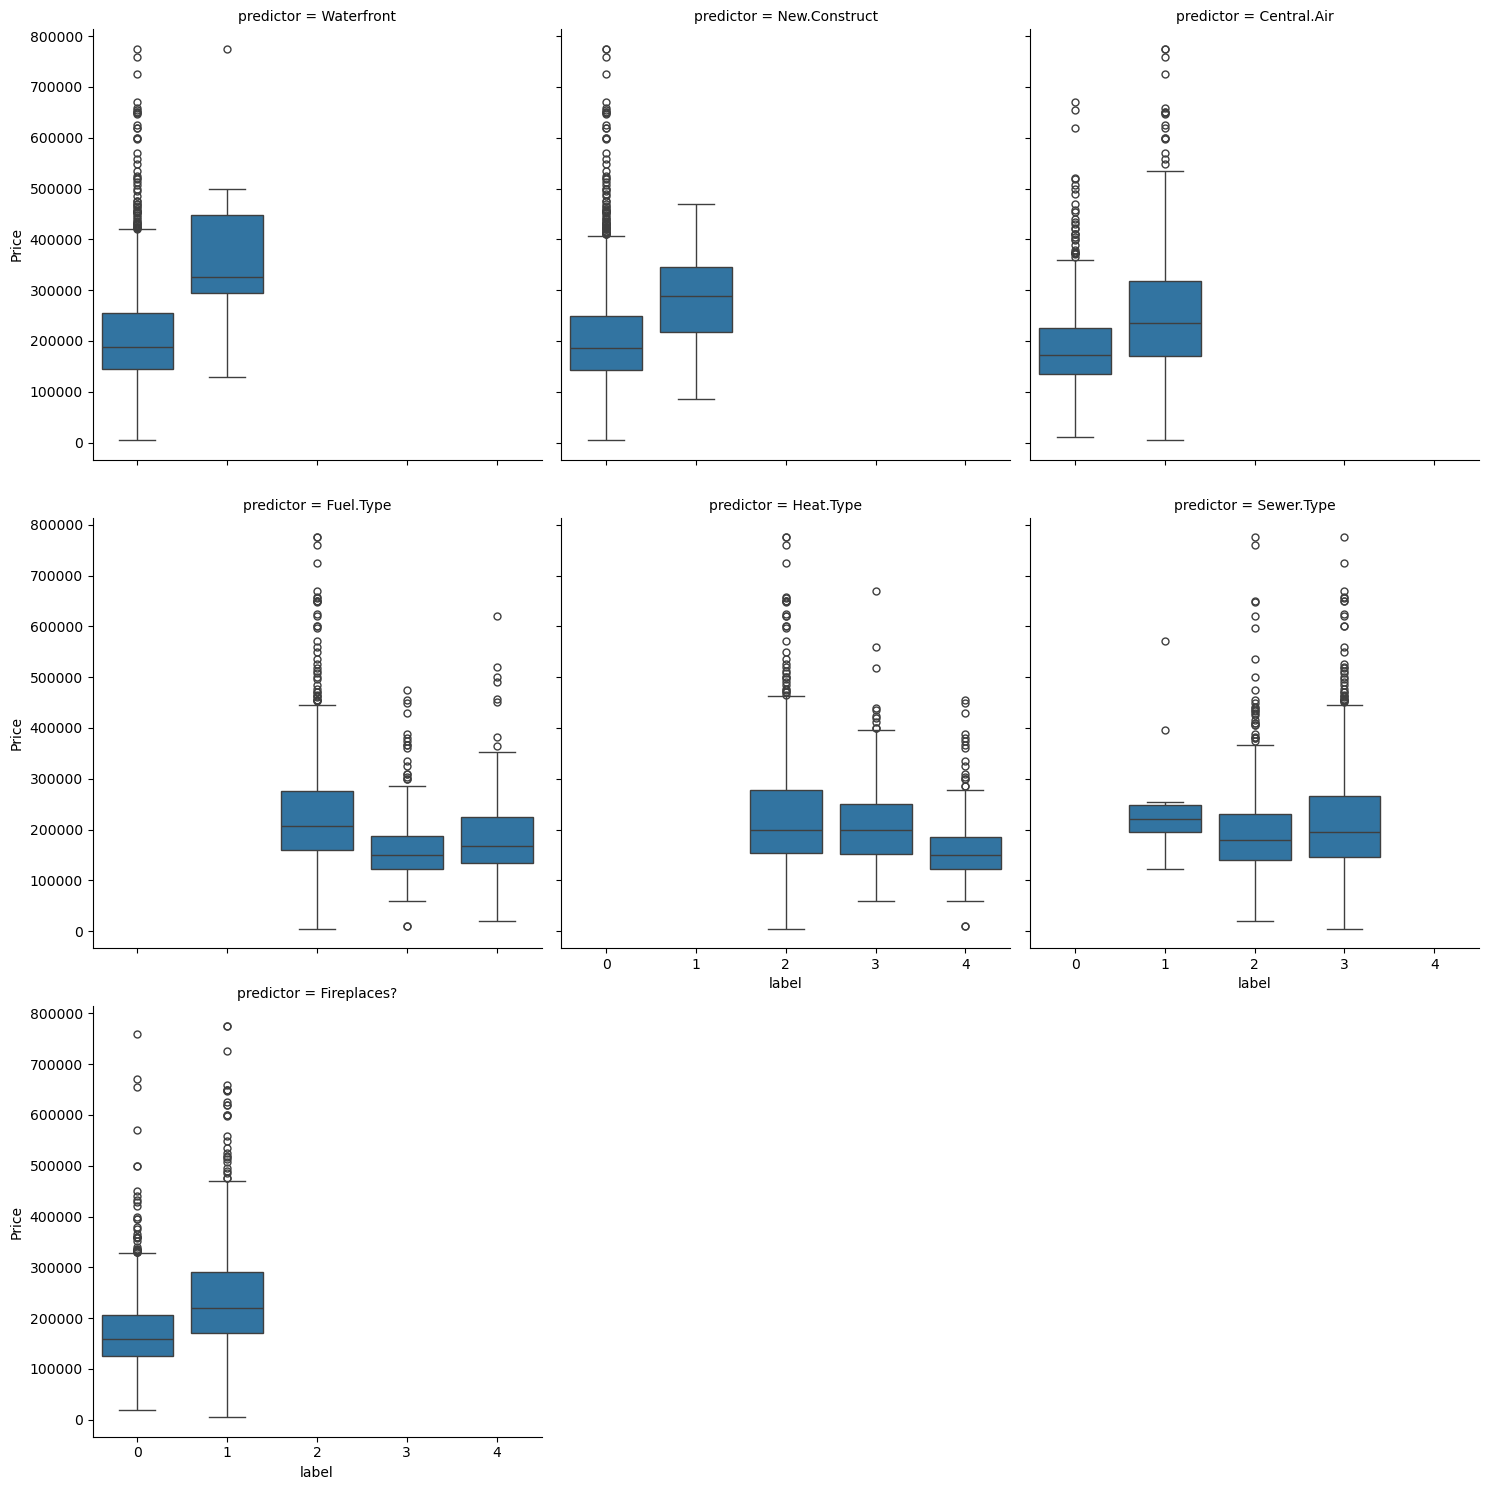

In [35]:
sns.catplot(
    data=cat_predictors, x="label", y="Price",
    col="predictor", kind="box", col_wrap=3
)



## Stack numerical predictors

In [11]:
(num_predictors :=
 SaratogaNYHomes
 .select([
     "Price",
     "Lot.Size",
     "Age",
     "Land.Value",
     "Living.Area",
     "Pct.College",
     "Rooms",
     "Bedrooms",
     "Bathrooms",
 ])
 .unpivot(
     index="Price",
     variable_name="predictor",
     value_name="value"
 )
 .to_pandas()
)


,Price,predictor,value
0,132500,Lot.Size,0.09
1,181115,Lot.Size,0.92
2,109000,Lot.Size,0.19
3,155000,Lot.Size,0.41
4,86060,Lot.Size,0.11
...,...,...,...
13819,289000,Bathrooms,2.50
13820,285000,Bathrooms,2.50
13821,194900,Bathrooms,1.00
13822,125000,Bathrooms,1.00


## Scatterplot of numerical predictor

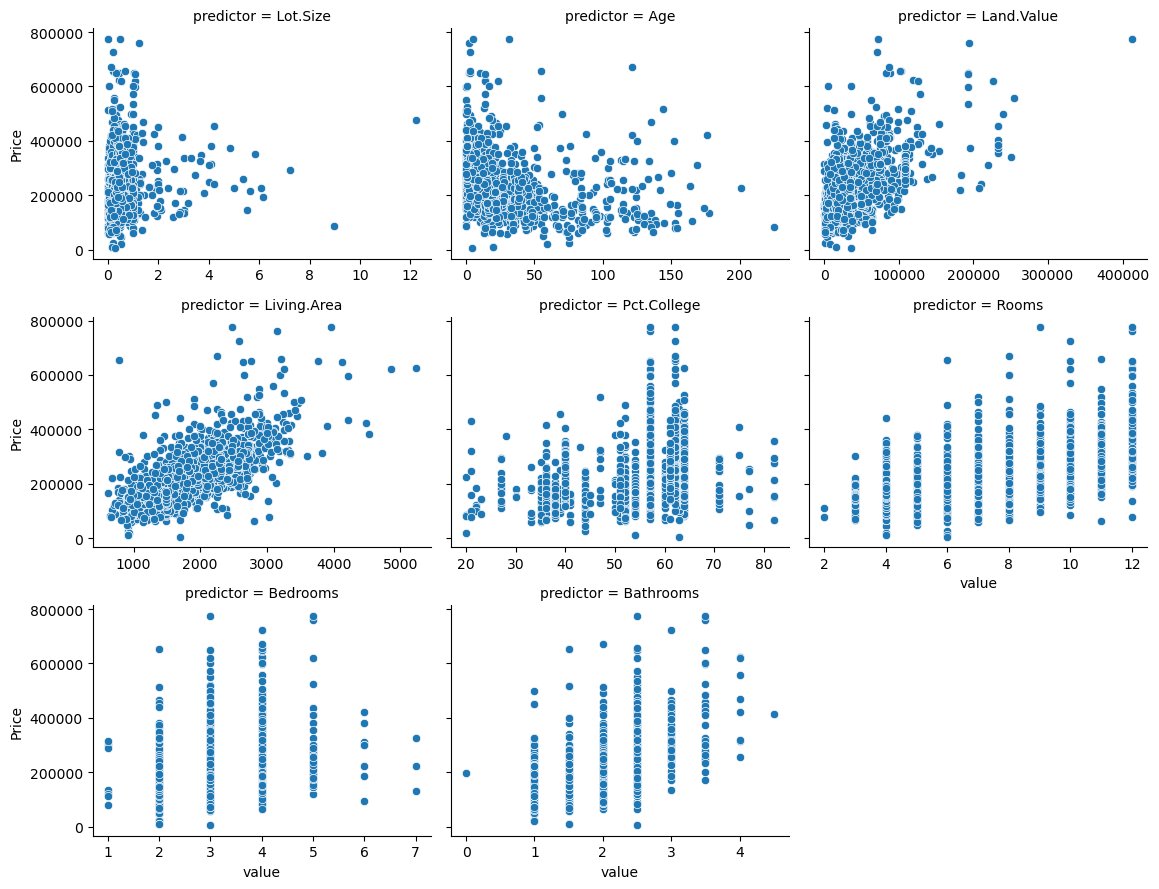

In [13]:
sns.relplot(
    data=num_predictors,
    x="value",
    y="Price",
    col="predictor",
    col_wrap=3,
    kind="scatter",
    facet_kws={"sharex": False},
    height=3,
    aspect=1.3
)

## Exploring How Numeric Predictors Relate to Housing Price


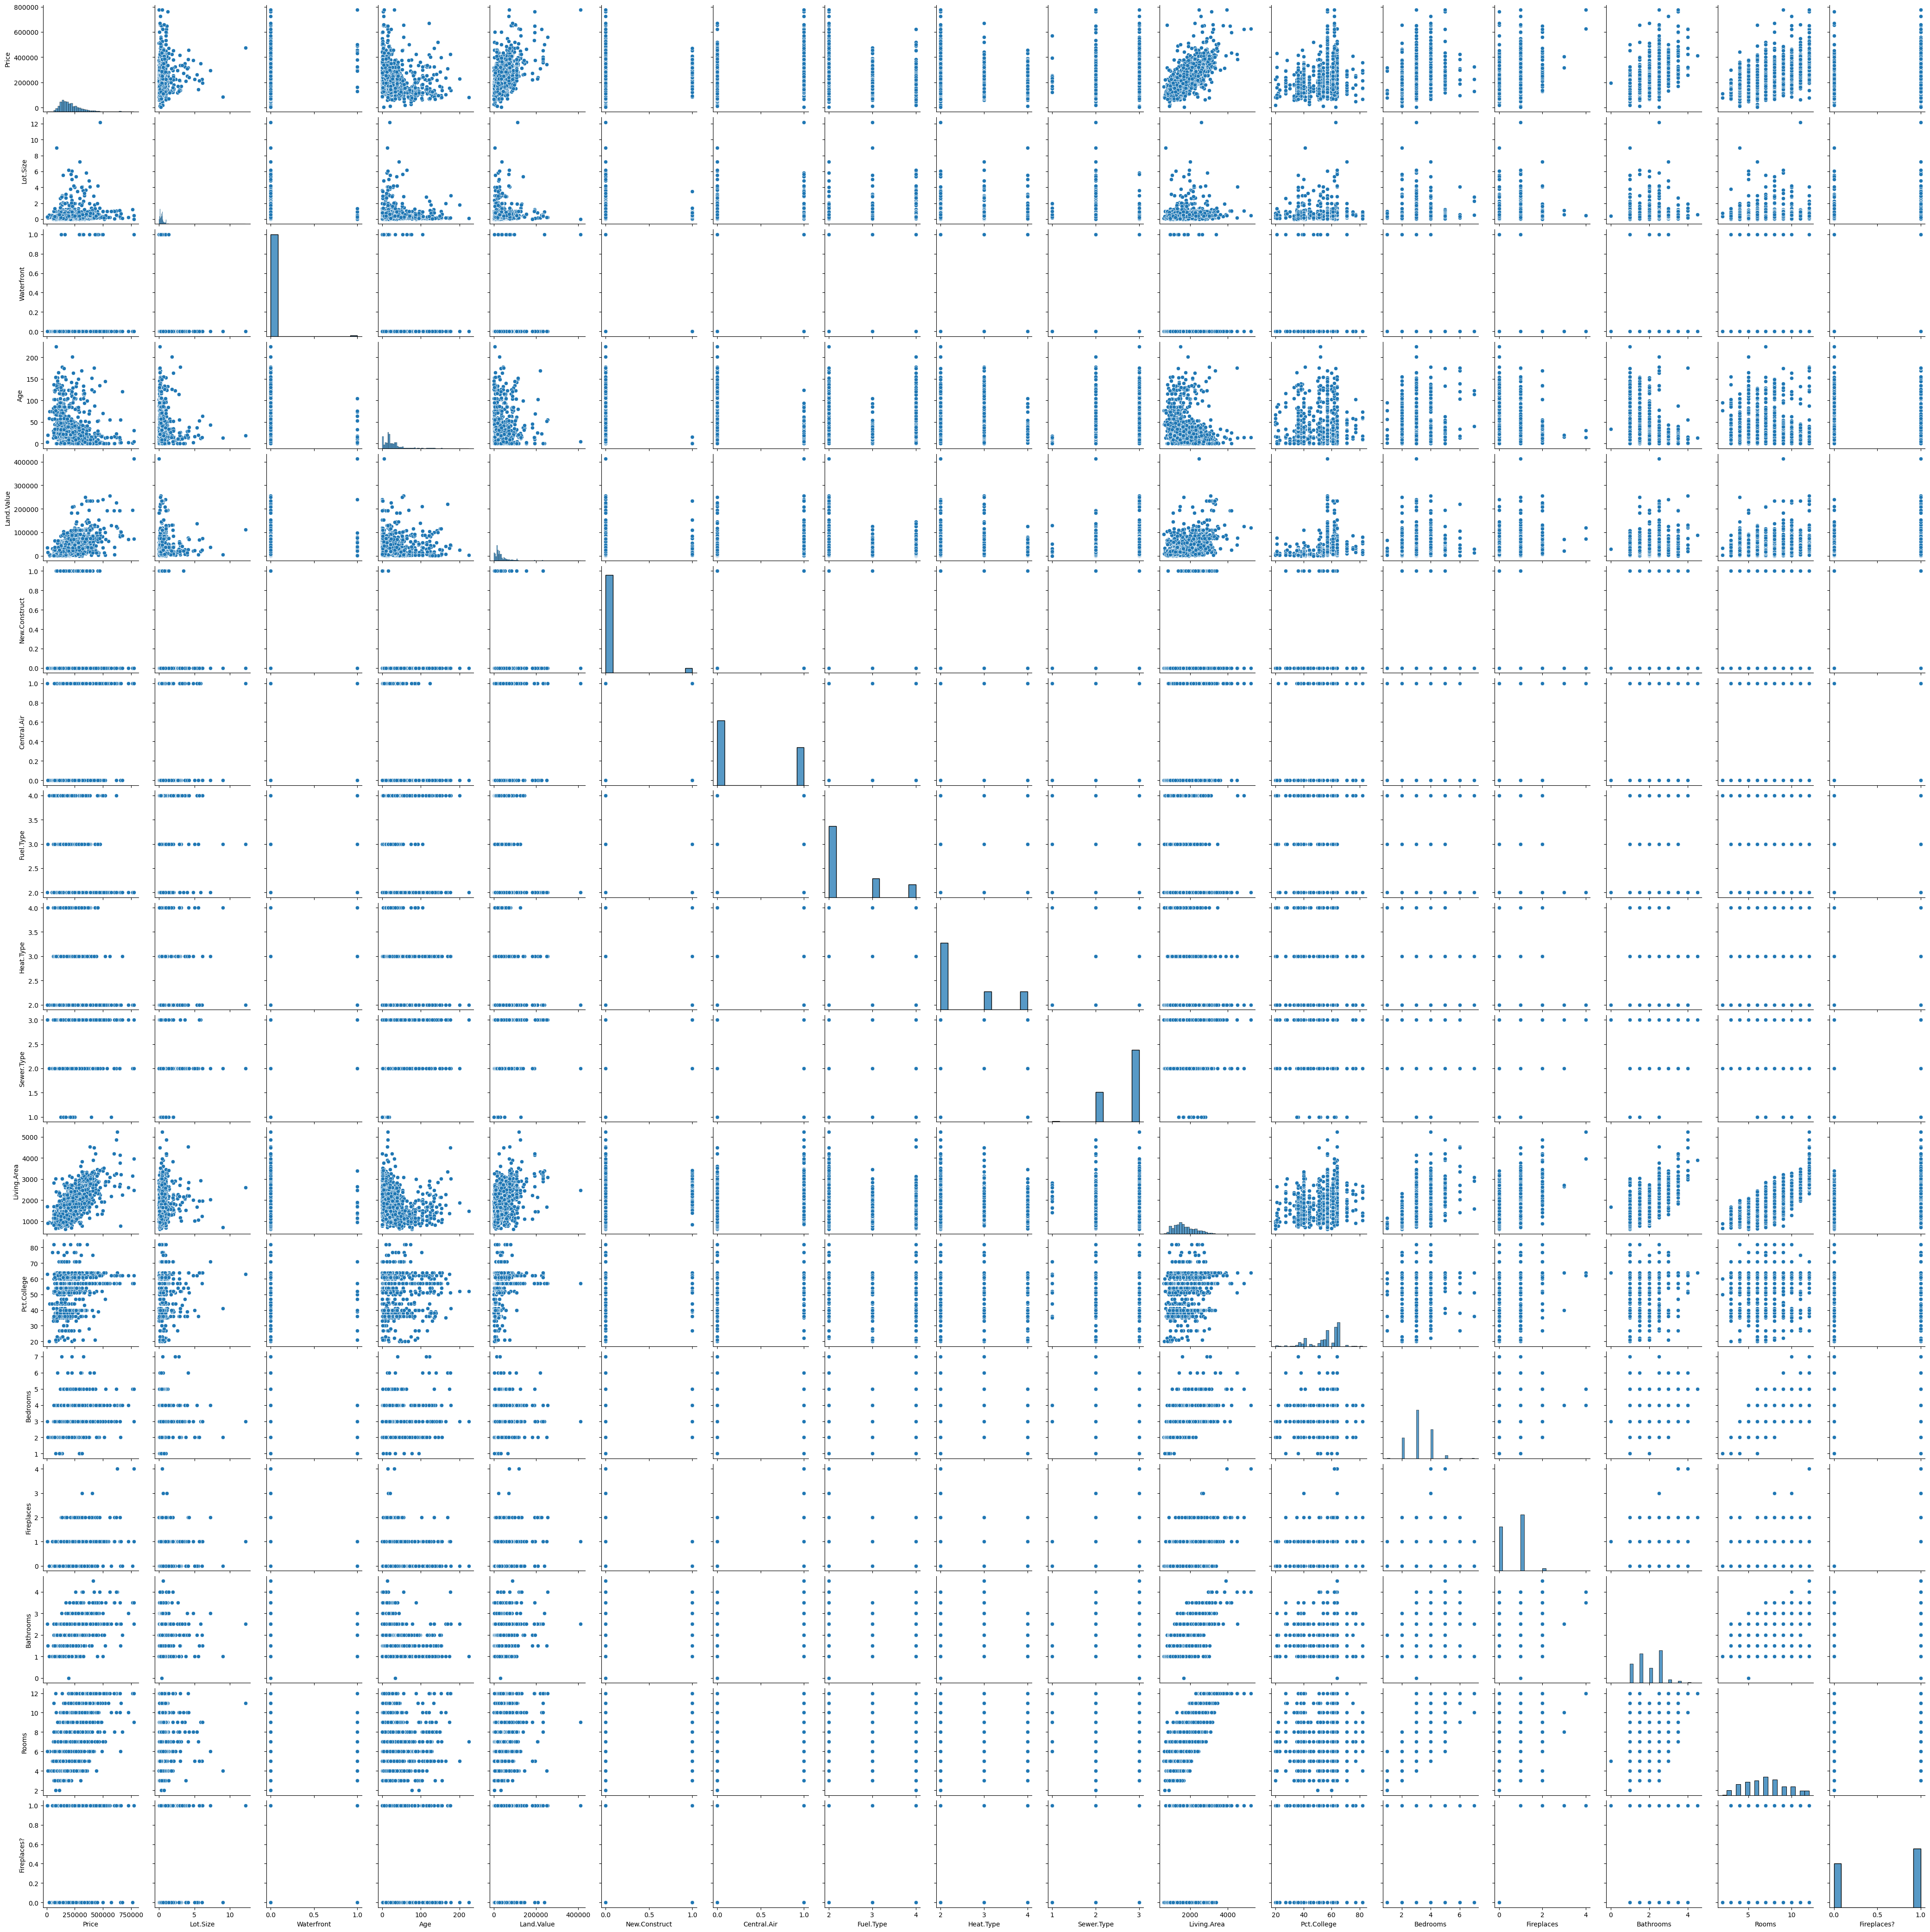

In [41]:
sns.pairplot(SaratogaNYHomes.to_pandas())




**Summary**
The results show that some predictors are much more helpful than others when it comes to understanding housing prices. Living area has the clearest relationship with price, where larger homes almost always sell for more, and land value also increases steadily with price, showing that location plays an important role. Features like waterfront access and having a fireplace are also linked to higher prices, which suggests that certain amenities add noticeable value to a home. Other variables such as lot size, age, and percent college in the area do not show strong or consistent patterns with price and appear to be less useful on their own. Overall, predictors that describe the size and desirability of a home are the most effective for measuring and predicting housing price.